<a href="https://colab.research.google.com/github/Stergios-Konstantinidis/DMML2022_Nestle/blob/main/DMML2022_Nestle_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder) 
- code (folder) 
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want. 

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (optional but useful). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [1]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# install Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### IMPORTANT
Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file. Save it in your Google Drive (not in a folder, in your general drive).

In [3]:
!mkdir ~/.kaggle

In [4]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [5]:
!mkdir data


In [6]:
# download the dataset from the competition page

try:
  df = pd.read_csv('/content/data/training_data.csv')
except:
  !kaggle competitions download -c detecting-french-texts-difficulty-level-2022
  !unzip "detecting-french-texts-difficulty-level-2022.zip" -d data

  0% 0.00/303k [00:00<?, ?B/s]
100% 303k/303k [00:00<00:00, 90.8MB/s]
Archive:  detecting-french-texts-difficulty-level-2022.zip
  inflating: data/sample_submission.csv  
  inflating: data/training_data.csv  
  inflating: data/unlabelled_test_data.csv  


In [7]:
# read in your training data
import pandas as pd
import numpy as np
import sklearn 
#import sklearn.model_selection

df = pd.read_csv('/content/data/training_data.csv')

In [8]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


Have a look at the data on which to make predictions.

In [9]:
df_pred = pd.read_csv('/content/data/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [10]:
df_example_submission = pd.read_csv('/content/data/sample_submission.csv')
df_example_submission.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


#### Imports


In [11]:
#IMPORTS
#pip install numpy 
#pip install scipy
import spacy

from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
import spacy.cli
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem?

In [12]:
#Split data set
X= df['sentence']
y= df['difficulty']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#Baseline 
y.value_counts()/len(y)

A1    0.169375
C2    0.168125
C1    0.166250
B1    0.165625
A2    0.165625
B2    0.165000
Name: difficulty, dtype: float64

#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [14]:
texts = df['sentence']
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(texts)
pd.DataFrame(features.todense(),
columns=tfidf.get_feature_names())


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,02h00,03h00,10,100,1000,10000,105,11,110,...,événement,événements,êtes,être,êtres,êut,île,îles,ôta,ôter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.200821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
text_transformer = TfidfVectorizer(ngram_range=(1, 1), lowercase=True, max_features=150000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)


Calculate accuracy, precision, recall and F1 score on the test set.

In [ ]:
LR = LogisticRegressionCV(solver='lbfgs', cv=2, max_iter=10, random_state = 50)
LR.fit(X_train_text, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegressionCV(cv=2, max_iter=10, random_state=50)

In [ ]:
y_pred = LR.predict(X_test_text)

In [ ]:
##################
#Accuracy
accuracy = accuracy_score(X_test_text, y_pred)
print('Accuracy: %f' % accuracy)

#Precision
precision = precision_score(X_test_text, y_pred)
print('Precision: %f' % precision)

#Recall
recall = recall_score(X_test, y_pred)
print('Recall: %f' % recall)

#F1
f1 = f1_score(X_test, y_pred)
print('F1 score: %f' % f1)

In [ ]:
#One hot encoder ou label encoder 

df['oe_difficulty'] = ['0' if x == 'A1'
                   else '1' if x =='A2'
                   else '2' if x == 'B1'
                   else '3' if x=='B2'
                   else '4' if x== 'C1'
                   else '5'
                   for x in df.difficulty]

df.oe_difficulty.value_counts()
newY = df['oe_difficulty']

X= df['sentence']
newY = df['oe_difficulty']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, newY, test_size=0.2, random_state=0)

text_transformer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=150000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

In [ ]:
accur_test_LR = LR.score(X_test_text, y_test)
accur_test_LR

In [ ]:
y_pred = LR.predict(X_test_text)
precision_score_LR_test =  "Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')
recall_score_LR_test = "Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')
print(precision_score_LR_test)
print(recall_score_LR_test)

In [ ]:
# Print sentence with the predicted language level

i=0
for text in X_test_text:
  print((X_test.reset_index())._get_value(i, "sentence", takeable=False) + "  " + LR.predict(text))
  i+=1
  df_pred = pd.read_csv('/content/data/unlabelled_test_data.csv')
df_pred_text = text_transformer.transform(df_pred["sentence"])

df_pred['difficulty'] = list(map(lambda x : LR.predict(x)[0], df_pred_text))

df_pred = df_pred[["id", "difficulty"]]
df_pred = df_pred.set_index('id')

df_pred.to_csv('file_name.csv')
df_pred.head()

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

CONFUSION MATRIX:
[[91 40 22  4  2  2]
 [49 59 34  7  4 11]
 [16 27 76 12  9 20]
 [10  2 18 55 25 34]
 [ 6  3 12 25 66 61]
 [ 6  6  8 17 23 98]]


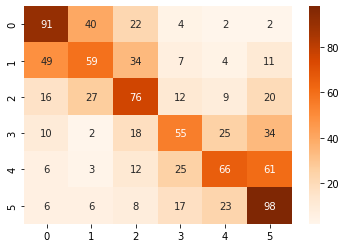

In [ ]:
def evaluate(test, pred):
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
evaluate(y_test, y_pred)

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, newY, test_size=0.2, random_state=0)

Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [ ]:
#KNN with 6 neightbors accuracy 0.2073
#KNN with 8 Neightbors accuracy 0.2073

knn = KNeighborsClassifier()
#K in range from 1 to 8
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
knn_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
knn_cv.fit(X_train_text, y_train)

y_pred_knn = knn_cv.predict(X_test_text)


Fitting 10 folds for each of 19 candidates, totalling 190 fits


In [ ]:
#KNN with minkowski and algorithm brute give us accuracy of: 0.1719
KNeighborsClassifier(algorithm='brute', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
knn.fit(X_train_text, y_train)

y_pred_knn = knn.predict(X_test_text)

In [ ]:
y_pred = knn.predict(X_test_text)
#Accuracy
accuracy = accuracy_score(X_test_text, y_pred_knn)
print('Accuracy: %f' % accuracy)

#Precision
precision = precision_score(X_test_text, y_pred_knn)
print('Precision: %f' % precision)

#Recall
recall = recall_score(X_test_text, y_pred_knn)
print('Recall: %f' % recall)

#F1
f1 = f1_score(X_test_text, y_pred_knn)
print('F1 score: %f' % f1)

In [ ]:
#Accuracy, Recall, Precision, F1
#avec micro partout la meme valeur 0.2073
#avec macro Precision , recall et Score different

#def evaluate(test, pred):
  #precision = precision_score(test, pred, pos_label='positive',
                                           #average='macro')
  #recall = recall_score(test, pred, pos_label='positive',
                                           #average='macro')
  #f1= f1_score(test, pred, pos_label='positive',
                                           #average='macro')
  #print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  #print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')

#evaluate(y_test, y_pred_knn)

#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
# first we tried depth 10, and accuracy of 0.1885
# with deph=16 we have accuracy =0.1969
# with deph=26 accuracy = 0.2042
# with deph =40. accuracy=0.2021

tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4000, 
                       random_state=50)
tree.fit(X_train_text, y_train)
y_pred_tree = tree.predict(X_test_text)

In [ ]:
#Accuracy, precision, f1

y_pred = tree.predict(X_test_text)
#Accuracy
accuracy = accuracy_score(X_test_text, y_pred_knn)
print('Accuracy: %f' % accuracy)

#Precision
precision = precision_score(X_test_text, y_pred_knn)
print('Precision: %f' % precision)

#Recall
recall = recall_score(X_test_text, y_pred_knn)
print('Recall: %f' % recall)

#F1
f1 = f1_score(X_test_text, y_pred_knn)
print('F1 score: %f' % f1)

#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
#One hot encoder ou label encoder 

df['oe_difficulty'] = ['0' if x == 'A1'
                   else '1' if x =='A2'
                   else '2' if x == 'B1'
                   else '3' if x=='B2'
                   else '4' if x== 'C1'
                   else '5'
                   for x in df.difficulty]

df.oe_difficulty.value_counts()
newY = df['oe_difficulty']

X= df['sentence']
newY = df['oe_difficulty']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, newY, test_size=0.2, random_state=0)

In [ ]:
texts = df['sentence']
tfidf = TfidfVectorizer(ngram_range=(1, 1))
features = tfidf.fit_transform(texts)
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names())

In [ ]:
text_transformer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=150000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

In [ ]:
#from sklearn.ensemble import RandomForestRegressor

## Doesnt work because it's for continuous variable like housing price 

#rf = RandomForestRegressor(random_state = 42)
#from pprint import pprint
# Look at parameters used by our current forest
#print('Parameters currently in use:\n')
#pprint(rf.get_params())

In [ ]:
#Using GridSearch to find the optimal parameters

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 4, cv = 2, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_clf.fit(X_train_text, y_train)

In [ ]:
rf_clf_test = rf_clf.score(X_test_text, y_test)
rf_clf_test


0.40625

In [ ]:
##Marche beaucoup moins bien

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_clf = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=42,
                                 n_jobs=20,
                                max_depth=40,
                                min_samples_split=5,
                                max_features=30000,
                                bootstrap = bool,
                                oob_score= bool,
                                warm_start= bool)
# Fit the random search model
rf_clf.fit(X_train_text, y_train)

In [ ]:
rf_clf_test = rf_clf.score(X_test_text, y_test)
rf_clf_test

0.325

In [ ]:
rf_clf_test = rf_clf.score(X_test_text, y_test)
rf_clf_test

0.40625

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_text, y_train)
base_accuracy = evaluate(base_model, X_test_text, y_test)


best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_text, y_test)


print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train_text, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_text, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [ ]:
#X, y = make_classification(n_samples=1000, n_features=4,
                          #n_informative=2, n_redundant=0,
                          #random_state=0, shuffle=False)


clf = RandomForestClassifier(random_state=0, bootstrap= True, max_depth= 80,
 max_features= 3, min_samples_leaf =5, n_estimators= 100)

clf.fit(X_train_text, y_train)
RandomForestClassifier(...)

y_pred_forest =  clf.predict(X_test_text)


In [ ]:
def evaluate(train, pred):
  precision = precision_score(train, pred,pos_label='positive',
                                           average='micro')
  recall = recall_score(train, pred,pos_label='positive',
                                           average='micro')
  f1= f1_score(train, pred,pos_label='positive',
                                           average='micro')
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')
evaluate(y_test, y_pred_forest)

CLASSIFICATION REPORT:
	Precision: 0.1646
	Recall: 0.1646
	F1_Score: 0.1646


In [ ]:
clf.score(X_train_text, y_train)
accur_train_forest = clf.score(X_train_text, y_train)
accur_train_forest

In [ ]:
clf.score(X_test_text, y_pred)
accur_test_forest = clf.score(X_test_text, y_test)
accur_test_forest

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [ ]:
#first let's check if there are NA's
df.isnull().sum()

id            0
sentence      0
difficulty    0
dtype: int64

In [ ]:
le_diff = pd.Series(LabelEncoder().fit_transform(df["difficulty"]), name="le_diff")
le_diff

0       4
1       0
2       0
3       0
4       2
       ..
4795    3
4796    4
4797    1
4798    5
4799    5
Name: le_diff, Length: 4800, dtype: int64

#### 4.7. Show a summary of your results

In [ ]:
tableau_data = {'Logistic Regression': [0.565376, accur_test_LR, accur_train_LR,  precision_score_LR_train, recall_score_LR_train],
        'KNN': [0.565376, accur_test_KNN , accur_train_KNN, precision_score_KNN, recall_score_KNN],
        'Decision Tree' : [accur_test_tree, accur_train_tree, precision_score_tree, recall_score_tree]
        'Random Forest': [accur_test_forest, accur_train_forest, precision_score_forest, recall_score_forest]}
  
# Creates pandas DataFrame.
tableau_df = pd.DataFrame(tableau_data, index=[ 'Base rate', 'Accuracy Test',
                               'Accuracy Train',
                               'Precision',
                               'Recall'])

tableau_df

SyntaxError: ignored

#### 4.8. Log regression, SVM, Naive Bayes

In [ ]:
#Instantiate the encoder
oe=OrdinalEncoder()

# set the order of your categories
oe.set_params(categories= [['0', '1', '2', '3', '4','5']])

# fit-transform a dataframe of the categorical age variable
oe_difficulty =oe.fit_transform(df[['oe_difficulty']])

#number of values per class
oe_difficulty = pd.DataFrame(oe_difficulty).astype('int')
oe_difficulty.value_counts()

In [ ]:
#### NEW TEST

#Encode Data
#Split data set

X= df['sentence']
y= df['difficulty']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

df['oe_difficulty'] = [0 if x == 'A1'
                   else 2 if x =='A2'
                   else 1 if x== 'B1'
                   else 3 if x == 'B2'
                   else 4 if x == 'C1'
                   else 5
                   for x in df.difficulty]
df.drop(labels='difficulty', axis=1)

#Encode column
df.oe_difficulty.value_counts()
newY = df['oe_difficulty']
X= df['sentence']
newY = df['oe_difficulty']

#Encoded dataframe
df_encoded= df.drop('difficulty', axis = 1)
df_encoded

#Vectorize
text_transformer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=150000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, newY, test_size=0.2, random_state=0)


In [ ]:
#pca = decomposition.PCA()
#std_slc = StandardScaler()
#logistic_Reg = linear_model.LogisticRegression()
#pipe = Pipeline(steps=[('std_slc', std_slc),
                           #('pca', pca),
                           #('logistic_Reg', logistic_Reg)])

#PCA
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#pca.fit(X_train_text)
#PCA(n_components=2)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

In [ ]:
##NEW TEST

#Vectorize
texts = df['sentence']
tfidf = TfidfVectorizer(ngram_range=(1, 1))
features = tfidf.fit_transform(texts)
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names())

#Transform
text_transformer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=150000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

#Split 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
LR_cv = LogisticRegressionCV(solver='lbfgs', cv=10, max_iter=100, random_state = 0)

LR_cv.fit(X_train_text, y_train)

In [ ]:
LR_accur_test = LR_cv.score(X_test_text, y_test)
LR_accur_test

In [ ]:
#solver='lbfgs', 
#cv=10, 
#max_iter=100, 
#random_state = 0)
0.5520833333333334

#With vectorizer
#solver='lbfgs', 
#cv=10, 
#max_iter=100, 
#random_state = 0)
0.5520833333333334


#solver='newton-cholesky', 
#cv=10
#max_iter=100, 
#random_state = 0)
#took to much time


#solver='lbfgs'
# cv=10, 
#max_iter=100, 
#random_state = 0)
0.46458333333333335


#Vectorize
#Encoded Y
#solver='lbfgs'
# cv=10, 
#max_iter=100, 
#random_state = 0)
0.553125

#Vectorize
#Encoded Y TRUUUUUE
#solver='lbfgs'
# cv=10, 
#max_iter=100, 
#random_state = 0)
0.46458333333333335

#LOG reg
#Vectorize
#Delete columns with intergers
#Random_state 5
0.471875

In [ ]:
#NEW TEST
#Vectorize
#Drop columns with integer & hours


X = pd.DataFrame(features.todense(), columns=tfidf.get_feature_names())
y= df['difficulty']

X.drop(X.iloc[:, 1:2000], inplace=True, axis=1)

text_transformer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=13000)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=5)


LR_cv = LogisticRegressionCV(solver='lbfgs', cv=10, max_iter=100, random_state = 0)

LR_cv.fit(X_train, y_train)

In [ ]:
LR_accur_test = LR_cv.score(X_test, y_test)
LR_accur_test


0.471875

In [ ]:
#SUBMIT THIS ONE#

#TEST Support Vector Machine
#Split 
from sklearn.model_selection import cross_val_score,KFold
X= df['sentence']
y= df['difficulty']
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1, random_state=5)

#Vectorize
texts = df['sentence']
tfidf = TfidfVectorizer(ngram_range=(1, 1))
features = tfidf.fit_transform(texts)
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names())

#Transform
text_transformer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=150000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

#Split here? 

from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
              ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, warm_start= True ,random_state=77777, max_iter=200, class_weight = 'balanced',learning_rate='optimal',validation_fraction = 0.5,tol=None)),
               ])
#kf=KFold(n_splits=5)


sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

#accuracy 0.5229166666666667#

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


accuracy 0.5229166666666667
Cross Validation Scores are [0.45833333 0.45416667 0.45833333 0.44791667 0.43229167]
Average Cross Validation score :0.4502083333333333


In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.5229166666666667


In [ ]:
#WORD 2 VEC + LOG REG
import gensim
from gensim.models import Word2Vec


In [14]:
#Naive bayes test

# NEW TEST NAIVE BAYES
# Gaussian Naive Bayes Classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB

#Encode column
df.oe_difficulty.value_counts()
newY = df['oe_difficulty']
X= df['sentence']
newY = df['oe_difficulty']

#Encoded dataframe
df_encoded= df.drop('difficulty', axis = 1)
df_encoded

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, newY, test_size=0.1, random_state=5)

#Vectorize
text_transformer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=150000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ] )


nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


AttributeError: ignored

#### 4.9. BERT



In [16]:
####################################################### RUN tututututuuu ########################################################
##NEW TEST

#Vectorize
texts = df['sentence']
tfidf = TfidfVectorizer(ngram_range=(1, 1))
features = tfidf.fit_transform(texts)
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names())

#Transform
text_transformer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=150000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

#Split 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
####################################################### RUN tututututuuu ########################################################

###BERT MODEL

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
!pip install transformers
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

#Import bert model
bert = AutoModel.from_pretrained('bert-base-uncased')

#Load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.0 MB/s 
     |████████████████████████████████| 7.6 MB 67.5 MB/s 
     |████████████████████████████████| 182 kB 76.1 MB/s 


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [20]:
####################################################### RUN tututututuuu ########################################################
df_one = df.drop(['difficulty'], axis=1)
df_one['oe_difficulty'].value_counts(normalize = True)
df_one


KeyError: ignored

In [19]:
####################################################### RUN tututututuuu ########################################################
#lenghts of messages
df_one['oe_difficulty'] = [0 if x == 'A1'
                   else 2 if x =='A2'
                   else 1 if x== 'B1'
                   else 3 if x == 'B2'
                   else 4 if x == 'C1'
                   else 5
                   for x in df.difficulty]
df.drop(labels='difficulty', axis=1)




train_text, temp_text, train_labels, temp_labels = train_test_split(df_one['sentence'], df_one['oe_difficulty'],
                                                                    random_state=2018,     
                                                                    test_size=0.1, 
                                                                    stratify=df_one['oe_difficulty']) 

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.1, 
                                                                stratify=temp_labels)

265

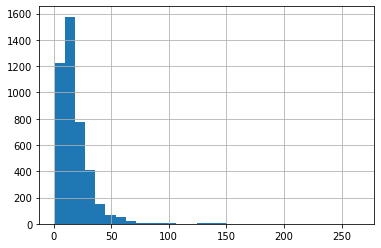

In [21]:
####################################################### RUN tututututuuu ########################################################
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

#The longest sequence message is 265
max(seq_len)

In [35]:
####################################################### RUN tututututuuu ########################################################
#Tokenization 
#BERT uses Wordpiece tokenization: 
#The vocabulary is initialized with all the individual 
#characters in the language, and then the most frequent/likely combinations 
#of the existing words in the vocabulary are iteratively added.

# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 200,
    pad_to_max_length=True,
    truncation=True)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 200,
    pad_to_max_length=True,
    truncation=True)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 200,
    pad_to_max_length=True,
    truncation=True)

print(test_text)


4652                   Il a cru que nous avons eu raison.
1513    La trap, ça reste du rap, c'est juste un petit...
3825    Et parions que ces nouvelles technologies saur...
4198    Pour que les actions de terrain contre la diff...
1826                             Je vous ouvre un compte.
7       Il est particulièrement observé chez les perso...
229     Même sans se considérer forcément comme un "cy...
3602    Ils permirent ainsi, pour le meilleur et pour ...
118     L'émigration galicienne sous-tend l'évolution ...
1433    Il y a un an, j'ai décidé de ne plus manger de...
2731                 Tous les lundis, c'est la même chose
4714    Les filles de la classe, il n'y a que la mode ...
4635    Et l'abattage d'un tiers du troupeau de Yellow...
2559    Puis, sortant mon mouton de sa poche, il se pl...
341     Ainsi une centaine de caméras automatiques ins...
4118    Tous ces préparatifs rendent chaque année l'at...
2905    Et aussi grâce à la télévision parce qu'on reg...
4283    Chère 

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [23]:
####################################################### RUN tututututuuu ########################################################
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [24]:
####################################################### RUN tututututuuu ########################################################
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 1000

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [25]:
####################################################### RUN tututututuuu ########################################################
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [26]:
####################################################### RUN tututututuuu ########################################################
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        
        self.bert = bert 
        
        # dropout layer
        self.dropout = nn.Dropout(0.1)
      
        # relu activation function
        self.relu =  nn.ReLU()

        #Longest sequence = 265
        # dense layer 1
        self.fc1 = nn.Linear(768,265)
      
        #longest sequence 265 and 6 classes
        # dense layer 2 (Output layer)
        
        self.fc2 = nn.Linear(265,6)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):
        
        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      
        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)
      
        # apply softmax activation
        x = self.softmax(x)

        return x

In [27]:
####################################################### RUN tututututuuu ########################################################
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [28]:
####################################################### RUN tututututuuu ########################################################
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5) 

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [29]:
####################################################### RUN tututututuuu ########################################################
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights

class_weights = compute_class_weight('balanced', classes= np.unique(train_labels), y= train_labels)

print("Class Weights:",class_weights)

Class Weights: [0.98360656 1.00699301 1.00558659 1.00981767 1.00278552 0.99173554]


In [43]:
####################################################### RUN tututututuuu ########################################################
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 3000

In [53]:
####################################################### RUN tututututuuu ########################################################
## FINE TUNE

# function to train the model
def train():
    
    model.train()
    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
        
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
        
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch
        print("ID")
        print(sent_id.type())
        print("mask")
        print(mask.type())
        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
  
      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [30]:
####################################################### RUN tututututuuu ########################################################
# function for evaluating the model
def evaluate():
    
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0
    
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
        
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
            
            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [54]:
####################################################### RUN tututututuuu ########################################################
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 3000
ID
torch.cuda.LongTensor
mask
torch.cuda.LongTensor
ID
torch.cuda.LongTensor
mask
torch.cuda.LongTensor


KeyboardInterrupt: ignored

In [86]:
####################################################### RUN tututututuuu ########################################################
path = 'drive/MyDrive/saved_weights.pt'
model.load_state_dict(torch.load(path))

tokens_test = tokenizer.batch_encode_plus(
    df['sentence'][0:20].tolist(),
    max_length = 200,
    pad_to_max_length=True,
    truncation=True)

#print(tokens_test)
torch.zeros([2,4], dtype=torch.int32)
#print(torch.Tensor(tokens_test['attention_mask']))

Input_id = torch.Tensor(tokens_test['input_ids'])

Input_id = Input_id.type(torch.int64)

Attention_mask = torch.Tensor(tokens_test['attention_mask'])
Attention_mask = Attention_mask.type(torch.int64)
Input_id=Input_id.to(cuda0)
Attention_mask=Attention_mask.to(cuda0)

print(model(Input_id,Attention_mask))
print(df.head(20))

tensor([[-9.2215, -5.7813, -8.0589, -1.9898, -0.5857, -1.1939],
        [-1.8517, -1.1688, -0.7128, -3.8838, -4.8434, -4.2996],
        [-2.0154, -1.6394, -2.0784, -1.0851, -1.8005, -3.1136],
        [-0.8081, -1.7799, -1.1906, -3.3892, -3.9412, -3.5605],
        [-6.3138, -3.3145, -4.7795, -1.6145, -0.9906, -0.9595],
        [-0.6244, -2.2415, -1.1095, -4.2358, -4.9475, -4.9878],
        [-1.4577, -1.2477, -1.3013, -2.2207, -2.7031, -3.4311],
        [-6.5703, -2.5159, -4.4201, -1.5898, -1.3024, -0.8441],
        [-1.1488, -1.4891, -0.9778, -3.3522, -4.1334, -3.4987],
        [-2.3935, -1.2226, -1.3382, -1.8552, -2.3685, -2.2840],
        [-0.3203, -2.8454, -1.6090, -4.4832, -5.9186, -6.2913],
        [-4.8413, -2.7933, -3.8310, -0.9308, -1.0464, -1.8092],
        [-2.4703, -1.0897, -1.4972, -1.9066, -2.2255, -2.3149],
        [-0.9674, -1.7242, -1.6350, -1.7208, -2.9871, -4.0571],
        [-3.1157, -1.4914, -2.0938, -1.1504, -1.8486, -2.0145],
        [-5.8012, -2.5136, -3.7107, -1.7

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
####################################################### RUN tututututuuu ########################################################
## HERE WE MAKING PREDICTIONS

# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

In [ ]:
####################################################### RUN tututututuuu ########################################################
# model's performance
preds = np.argmax(preds, axis = 1)

print(classification_report(test_y, preds))

In [ ]:

#BERT
#Batch 32
#epoch 10
#Accuracy 0.26

#Batch 1000
#epoch 1000
#Accuracy:
# 0.32

#Batch 1000
#epoch100
#tokenization 50
#0.33 

#Batch 10000
#epoch 50
#tokenization 100
#0.35 

#Batch 1000
#epoch 300
#tokenization 150
#0.40 

#Naive Bayes 
0.4822916666666667

#Naive bayes with 90% train set
0.4979166666666667

#Naive bayes 
#Random state: 5
#accuracy 0.5166666666666667


#SVM
#0.4583333333333333

#SVM with 90% train set
#random state 5
#accuracy 0.5270833333333333

#SVM with 90% train set
#random state 77777
#accuracy 0.5229166666666667

In [ ]:
LR_cv = LogisticRegressionCV(solver='sag', cv=10, max_iter=100, random_state = 0, warm_start= bool,)

In [ ]:
#Logistic regression 2.0
texts = df['sentence']
tfidf = TfidfVectorizer(ngram_range=(1, 1))
features = tfidf.fit_transform(texts)
df_ed=pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())
df_ed